In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import calendar

In [2]:
df = pd.read_csv('data/weatherstats_vancouver_hourly_excelclean.csv')
df.head()

,date_time_local,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_okta,max_air_temp_pst1hr,min_air_temp_pst1hr
0,2013-07-01 00:00:00 PDT,101.18,101.16,SSE,16.0,7,NaN,91,18.2,19.7,0.0,0.0,32200.0,2.9,NaN,19.4,18.5
1,2013-07-01 01:00:00 PDT,101.22,101.21,SE,13.0,6,NaN,89,17.8,19.6,0.0,0.0,32200.0,3.0,NaN,20.1,18.7
2,2013-07-01 02:00:00 PDT,101.26,101.24,E,10.0,11,NaN,88,16.7,18.7,0.0,0.0,32200.0,3.0,NaN,19.8,18.0
3,2013-07-01 03:00:00 PDT,101.26,101.25,E,10.0,4,NaN,84,16.5,19.2,0.0,0.0,32200.0,2.7,NaN,18.5,17.5
4,2013-07-01 04:00:00 PDT,101.30,101.28,NNW,33.0,5,NaN,87,15.7,17.9,0.0,0.0,32200.0,2.6,NaN,18.8,17.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time_local      87648 non-null  object 
 1   pressure_station     87648 non-null  float64
 2   pressure_sea         87648 non-null  float64
 3   wind_dir             87648 non-null  object 
 4   wind_dir_10s         87617 non-null  float64
 5   wind_speed           87648 non-null  int64  
 6   wind_gust            7872 non-null   float64
 7   relative_humidity    87648 non-null  int64  
 8   dew_point            87648 non-null  float64
 9   temperature          87648 non-null  float64
 10  windchill            87642 non-null  float64
 11  humidex              85631 non-null  float64
 12  visibility           87606 non-null  float64
 13  health_index         86746 non-null  float64
 14  cloud_okta           84593 non-null  float64
 15  max_air_temp_pst1hr  87412 non-null 

In [4]:
# Changed data type for date to datetime. Used utc=False argument to remove the PDT indicator as it was causing an error.
df['date_time_local'] = pd.to_datetime(df['date_time_local'], utc=False)
df = df.set_index('date_time_local')
df.head()

C:\Users\pedro\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\pedro\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_okta,max_air_temp_pst1hr,min_air_temp_pst1hr
date_time_local,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,101.18,101.16,SSE,16.0,7,NaN,91,18.2,19.7,0.0,0.0,32200.0,2.9,NaN,19.4,18.5
2013-07-01 01:00:00,101.22,101.21,SE,13.0,6,NaN,89,17.8,19.6,0.0,0.0,32200.0,3.0,NaN,20.1,18.7
2013-07-01 02:00:00,101.26,101.24,E,10.0,11,NaN,88,16.7,18.7,0.0,0.0,32200.0,3.0,NaN,19.8,18.0
2013-07-01 03:00:00,101.26,101.25,E,10.0,4,NaN,84,16.5,19.2,0.0,0.0,32200.0,2.7,NaN,18.5,17.5
2013-07-01 04:00:00,101.30,101.28,NNW,33.0,5,NaN,87,15.7,17.9,0.0,0.0,32200.0,2.6,NaN,18.8,17.3


In [5]:
# Confirmed, 'date_time_local' has been changed to datetime type and it has been set as an index.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87648 entries, 2013-07-01 00:00:00 to 2023-06-30 23:00:00
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pressure_station     87648 non-null  float64
 1   pressure_sea         87648 non-null  float64
 2   wind_dir             87648 non-null  object 
 3   wind_dir_10s         87617 non-null  float64
 4   wind_speed           87648 non-null  int64  
 5   wind_gust            7872 non-null   float64
 6   relative_humidity    87648 non-null  int64  
 7   dew_point            87648 non-null  float64
 8   temperature          87648 non-null  float64
 9   windchill            87642 non-null  float64
 10  humidex              85631 non-null  float64
 11  visibility           87606 non-null  float64
 12  health_index         86746 non-null  float64
 13  cloud_okta           84593 non-null  float64
 14  max_air_temp_pst1hr  87412 non-null  float64
 15  m

In [6]:
# We need to clean the rest of the data and we will start by identifying the missing values.
df.isna().sum()

pressure_station           0
pressure_sea               0
wind_dir                   0
wind_dir_10s              31
wind_speed                 0
wind_gust              79776
relative_humidity          0
dew_point                  0
temperature                0
windchill                  6
humidex                 2017
visibility                42
health_index             902
cloud_okta              3055
max_air_temp_pst1hr      236
min_air_temp_pst1hr      236
dtype: int64

In [7]:
# The wind_dir_10s is a mirror of the wind_dir column. It states wind direction in degrees instead of the cardinal directions.
df = df.drop('wind_dir_10s', axis=1)

In [8]:
# I'm creating a copy of the dataframe here before I being filling NA values.
df2 = df.copy()

In [9]:
# This is the formula to calculate the humidex.
humidex = (df['temperature'] + 0.5555 * ((6.11 * 2.71828 ** (5417.753 * ((1/273.16) - (1/(273.15 + df['dew_point']))))) - 10)).round()

In [10]:
# I am using the fillna function and enter the formula above to calculate those missing values.
df2['humidex'].fillna(humidex, inplace=True)

In [11]:
# This is a double check to make sure the missing values were replaced.
df2.isna().sum()

pressure_station           0
pressure_sea               0
wind_dir                   0
wind_speed                 0
wind_gust              79776
relative_humidity          0
dew_point                  0
temperature                0
windchill                  6
humidex                    0
visibility                42
health_index             902
cloud_okta              3055
max_air_temp_pst1hr      236
min_air_temp_pst1hr      236
dtype: int64

In [12]:
# The missing values for humidex were randomly placed along the data, I will download it here to review for accuracy.
df2.to_csv('data/humidex_test.csv', index=True)

Upon review of the humidex_test.csv in Excel I was able to confirm the humidex is being calculated correctly for the previously empty values. Also, the values are rounding up or down accordingly.

In [13]:
wind_gust_percent = (df2['wind_gust'].value_counts().sum()/df2['wind_gust'].shape[0]*100).round()
print(f"NA Values for wind_gust: {df2['wind_gust'].isna().sum()}")
print(f"Values for wind_gust: {df2['wind_gust'].value_counts().sum()}")
print(f"Percentage of wind_gust data available: {wind_gust_percent}")

NA Values for wind_gust: 79776
Values for wind_gust: 7872
Percentage of wind_gust data available: 9.0


Despite the low percentage of data available, wind_gust may still be a valuable variable. I will keep it for now and explore it further. I will enter 0 for the empty values to indicate no wind_gust was present during those observations.

In [14]:
df2['wind_gust'].fillna(0, inplace=True)

In [15]:
df2.isna().sum()

pressure_station          0
pressure_sea              0
wind_dir                  0
wind_speed                0
wind_gust                 0
relative_humidity         0
dew_point                 0
temperature               0
windchill                 6
humidex                   0
visibility               42
health_index            902
cloud_okta             3055
max_air_temp_pst1hr     236
min_air_temp_pst1hr     236
dtype: int64

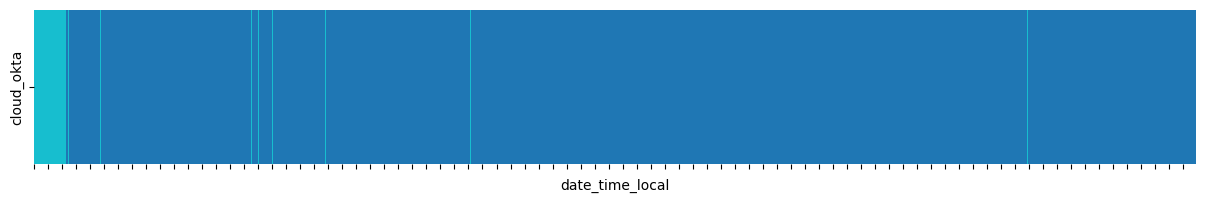

In [16]:
plt.figure(figsize=(15, 2))
cloud_okta_df = df2[['cloud_okta']]
ax = sns.heatmap(cloud_okta_df.isna().T, cmap="tab10", cbar=False)
ax.set(xticklabels=[])
plt.show()

The distribution of NA values shows a large amount of missing values at the beginning of the data set. Upon review of the data in Excel, I was able to ascertain that the first 2407 values are missing. This likely due to a change in the measurement type for cloud cover. The data used to use a different method to measure cloud cover before June 2013.

In [17]:
# Entered mean cloud_okta for the first 2407 rows, will fill the rest of the NA values later through interpolation.
df2['cloud_okta'].fillna(df2['cloud_okta'].mean, limit = 2407, inplace= True)

In [18]:
df2.isna().sum()

pressure_station         0
pressure_sea             0
wind_dir                 0
wind_speed               0
wind_gust                0
relative_humidity        0
dew_point                0
temperature              0
windchill                6
humidex                  0
visibility              42
health_index           902
cloud_okta             648
max_air_temp_pst1hr    236
min_air_temp_pst1hr    236
dtype: int64